In [1]:
import pandas as pd

### マクロファージでの発現変動解析の結果を読み込む

In [2]:
df_macrophage = pd.read_csv('GSE59831_signatureData.csv')

In [3]:
df_macrophage.head()

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,ENSMUSG00000048806,Ifnb1,15.389,6.580,4.409277e-210,7.450796e-206,1.0,0.133
1,ENSMUSG00000024008,Cpne5,-6.512,7.468,2.682281e-204,2.266259e-200,1.0,0.136
2,ENSMUSG00000030278,Cidec,-6.763,6.929,1.554051e-199,8.753454e-196,1.0,0.139
3,ENSMUSG00000010651,Acaa1b,-6.851,6.204,4.537875e-179,1.917025e-175,1.0,0.146
4,ENSMUSG00000034459,Ifit1,7.815,6.821,3.636083e-168,1.228851e-164,1.0,0.136


In [4]:
# 行数と列数を数える
df_macrophage.shape

(16898, 8)

### マクロファージでの発現変動解析から腫瘍組織で発現が上昇した遺伝子を抽出する

腫瘍組織で発現が上昇した遺伝子はここでは、以下の条件で抽出する

- Log_FoldChange > 1
- FDR_adjusted_P.value < 0.05

In [5]:
df_macrophage_up = df_macrophage[(df_macrophage['Log_FoldChange'] >1) & (df_macrophage['FDR_adjusted_P.value'] < 0.05)]

In [6]:
df_macrophage_up.head()

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,ENSMUSG00000048806,Ifnb1,15.389,6.580,4.409277e-210,7.450796e-206,1.0,0.133
4,ENSMUSG00000034459,Ifit1,7.815,6.821,3.636083e-168,1.228851e-164,1.0,0.136
7,ENSMUSG00000045932,Ifit2,6.683,7.556,1.343466e-154,2.837735e-151,1.0,0.134
8,ENSMUSG00000020641,Rsad2,8.386,7.494,1.991206e-153,3.738601e-150,1.0,0.153
9,ENSMUSG00000030605,Mfge8,6.267,9.998,3.934579e-128,6.648651e-125,1.0,0.146


In [7]:
# 行数と列数を数える
df_macrophage_up.shape

(1441, 8)

### 腫瘍組織の total lang cells での発現変動解析の結果を読み込む

In [8]:
df_total = pd.read_csv('GSE59831_signatureData (1).csv')

In [9]:
df_total.head()

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,ENSMUSG00000020609,Apob,10.307,5.623,1.609505e-173,2.923505e-169,1.0,0.174
1,ENSMUSG00000045991,Onecut2,7.972,5.347,8.584552e-131,7.796490e-127,1.0,0.185
2,ENSMUSG00000047230,Cldn2,7.562,5.710,6.063412e-108,3.671194e-104,1.0,0.205
3,ENSMUSG00000029260,Ugt2b34,11.141,4.715,2.554767e-102,1.160120e-98,1.0,0.228
4,ENSMUSG00000017950,Hnf4a,8.934,4.218,2.842774e-97,1.032723e-93,1.0,0.213


In [10]:
df_total.shape

(18164, 8)

### Total lung cells での発現変動解析から腫瘍組織で発現が上昇した遺伝子を抽出する

腫瘍組織で発現が上昇した遺伝子はここでは、以下の条件で抽出する

- Log_FoldChange > 1
- FDR_adjusted_P.value < 0.05

In [11]:
df_total_up = df_total[(df_total['Log_FoldChange'] >1) & (df_total['FDR_adjusted_P.value'] < 0.05)]

In [12]:
df_total_up.head()

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,ENSMUSG00000020609,Apob,10.307,5.623,1.609505e-173,2.923505e-169,1.0,0.174
1,ENSMUSG00000045991,Onecut2,7.972,5.347,8.584552e-131,7.796490e-127,1.0,0.185
2,ENSMUSG00000047230,Cldn2,7.562,5.710,6.063412e-108,3.671194e-104,1.0,0.205
3,ENSMUSG00000029260,Ugt2b34,11.141,4.715,2.554767e-102,1.160120e-98,1.0,0.228
4,ENSMUSG00000017950,Hnf4a,8.934,4.218,2.842774e-97,1.032723e-93,1.0,0.213


In [13]:
df_total_up.shape

(1717, 8)

### リガンド・受容体の遺伝子のペアのデータを読み込む

In [14]:
df_lr = pd.read_csv('LR_manual_revised.txt', sep='\t')

In [15]:
df_lr.head()

,From,To
0,CCK,CCKAR
1,GAST,CCKBR
2,GRP,GRPR
3,IL17F,IL17RA
4,NTN1,DSCAM


In [16]:
df_lr.shape

(1427, 2)

### 「リガンド・受容体の遺伝子のペア」の表と「マクロファージでの発現変動解析から腫瘍組織で発現が上昇した遺伝子」の表をマージする

In [17]:
df_macrophage_up['Gene_symbol'].head()

0    Ifnb1
4    Ifit1
7    Ifit2
8    Rsad2
9    Mfge8
Name: Gene_symbol, dtype: object

In [18]:
df_macrophage_up['Gene_symbol'] = df_macrophage_up['Gene_symbol'].str.upper()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_macrophage_up['Gene_symbol'].head()

0    IFNB1
4    IFIT1
7    IFIT2
8    RSAD2
9    MFGE8
Name: Gene_symbol, dtype: object

In [20]:
df_lr_new = pd.merge(df_lr, df_macrophage_up, left_on='From', right_on='Gene_symbol')

In [21]:
df_lr_new.head()

,From,To,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,B2M,HFE,ENSMUSG00000060802,B2M,1.060,10.855,1.778860e-09,3.045510e-08,1.000,0.129
1,CREG1,IGF2R,ENSMUSG00000040713,CREG1,1.475,8.757,3.665902e-10,6.829814e-09,1.000,0.169
2,DKK2,LRP6,ENSMUSG00000028031,DKK2,2.531,0.270,1.055939e-02,4.645470e-02,0.713,0.616
3,GAS6,TYRO3,ENSMUSG00000031451,GAS6,3.040,5.366,4.995328e-23,2.446697e-21,1.000,0.201
4,GAS6,AXL,ENSMUSG00000031451,GAS6,3.040,5.366,4.995328e-23,2.446697e-21,1.000,0.201


In [22]:
# 行数と列数を数える
df_lr_new.shape

(204, 10)

### マージでできたあと、「Total lung cells での発現変動解析から腫瘍組織で発現が上昇した遺伝子」の表をマージする

In [23]:
df_total_up['Gene_symbol'].head()

0       Apob
1    Onecut2
2      Cldn2
3    Ugt2b34
4      Hnf4a
Name: Gene_symbol, dtype: object

In [24]:
df_total_up['Gene_symbol'] = df_total_up['Gene_symbol'].str.upper()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_total_up['Gene_symbol'].head()

0       APOB
1    ONECUT2
2      CLDN2
3    UGT2B34
4      HNF4A
Name: Gene_symbol, dtype: object

In [26]:
df_lr_new = pd.merge(df_lr_new, df_total_up, left_on='To', right_on='Gene_symbol')

In [27]:
df_lr_new.shape

(41, 18)

In [28]:
df_lr_new

,From,To,Ensembl_ID_x,Gene_symbol_x,Log_FoldChange_x,logCPM_x,PValue_x,FDR_adjusted_P.value_x,Power_x,BCOV_x,Ensembl_ID_y,Gene_symbol_y,Log_FoldChange_y,logCPM_y,PValue_y,FDR_adjusted_P.value_y,Power_y,BCOV_y
0,GAS6,AXL,ENSMUSG00000031451,GAS6,3.040,5.366,4.995328e-23,2.446697e-21,1.000,0.201,ENSMUSG00000002602,AXL,1.876,8.112,9.989935e-13,2.835268e-11,1.000,0.216
1,GAS6,MERTK,ENSMUSG00000031451,GAS6,3.040,5.366,4.995328e-23,2.446697e-21,1.000,0.201,ENSMUSG00000014361,MERTK,2.407,5.917,1.093815e-30,2.048252e-28,1.000,0.167
2,CSF1,CSF1R,ENSMUSG00000014599,CSF1,3.761,6.010,1.185669e-36,1.043512e-34,1.000,0.187,ENSMUSG00000024621,CSF1R,2.274,7.959,9.484384e-20,6.196919e-18,1.000,0.202
3,CSF3,CSF3R,ENSMUSG00000038067,CSF3,4.362,-1.217,9.969984e-03,4.439336e-02,0.786,0.831,ENSMUSG00000028859,CSF3R,2.475,9.189,7.224014e-22,6.046866e-20,1.000,0.207
4,CXCL1,CXCR2,ENSMUSG00000029380,CXCL1,2.089,7.843,6.863849e-25,3.778023e-23,1.000,0.141,ENSMUSG00000026180,CXCR2,3.018,5.505,6.976092e-21,5.214557e-19,1.000,0.251
5,CXCL2,CXCR2,ENSMUSG00000058427,CXCL2,1.207,10.647,2.414868e-11,5.088085e-10,1.000,0.132,ENSMUSG00000026180,CXCR2,3.018,5.505,6.976092e-21,5.214557e-19,1.000,0.251
6,CXCL3,CXCR2,ENSMUSG00000029379,CXCL3,1.032,4.440,5.224607e-05,4.536763e-04,0.980,0.183,ENSMUSG00000026180,CXCR2,3.018,5.505,6.976092e-21,5.214557e-19,1.000,0.251
7,PPBP,CXCR2,ENSMUSG00000029372,PPBP,2.108,0.875,1.146588e-02,4.984576e-02,0.713,0.542,ENSMUSG00000026180,CXCR2,3.018,5.505,6.976092e-21,5.214557e-19,1.000,0.251
8,CXCL5,CXCR2,ENSMUSG00000029371,CXCL5,3.484,-0.219,7.584340e-03,3.560005e-02,0.823,0.766,ENSMUSG00000026180,CXCR2,3.018,5.505,6.976092e-21,5.214557e-19,1.000,0.251
9,IL1A,IL1RAP,ENSMUSG00000027399,IL1A,2.434,9.559,5.195475e-33,4.121743e-31,1.000,0.140,ENSMUSG00000022514,IL1RAP,1.190,5.510,4.242159e-06,4.006998e-05,1.000,0.215


### ネットワークとして描画する
参考: https://python-graph-gallery.com/324-map-a-color-to-network-nodes/

In [29]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


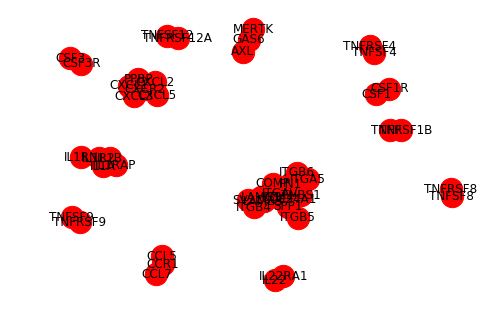

In [30]:

# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})

# Build your graph
G=nx.from_pandas_edgelist(df_lr_new, 'From', 'To', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()

nx.draw(G, with_labels=True, cmap=plt.cm.Set1, node_size=500)

#### ノードに色をつけるために表を新たに追加する

In [31]:
df_group = df_lr_new[['From', 'Gene_symbol_x']]
df_group['myvalue']  = 'From'
df_group.rename(columns={'From':'Gene', 'Gene_symbol_x':'Gene_symbol'}, inplace=True)

df_group2 = df_lr_new[['To', 'Gene_symbol_y']]
df_group2['myvalue']  = 'To'
df_group2.rename(columns={'To':'Gene', 'Gene_symbol_y':'Gene_symbol'}, inplace=True)

df_group = pd.concat([df_group, df_group2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [32]:
df_group.head()

,Gene,Gene_symbol,myvalue
0,GAS6,GAS6,From
1,GAS6,GAS6,From
2,CSF1,CSF1,From
3,CSF3,CSF3,From
4,CXCL1,CXCL1,From


In [33]:
df_group.shape

(82, 3)

In [34]:
df_group = df_group.drop_duplicates(subset='Gene',keep='first')

In [35]:
df_group.shape

(47, 3)

#### ネットワークの描画（今度はノードに色をつけるは）

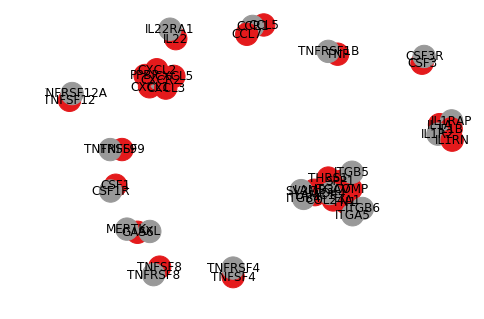

In [36]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(df_lr_new, 'From', 'To', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()

    
# # Here is the tricky part: I need to reorder carac to assign the good color to each node
carac = df_group
carac= carac.set_index('Gene')
carac=carac.reindex(G.nodes())
 
# # And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# pos = nx.spring_layout(G, iterations=100)

    
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=500)
# nx.draw(G, with_labels=True, cmap=plt.cm.Set1, node_size=1500)


#### 二部グラフ（bipartite graph）として描画する

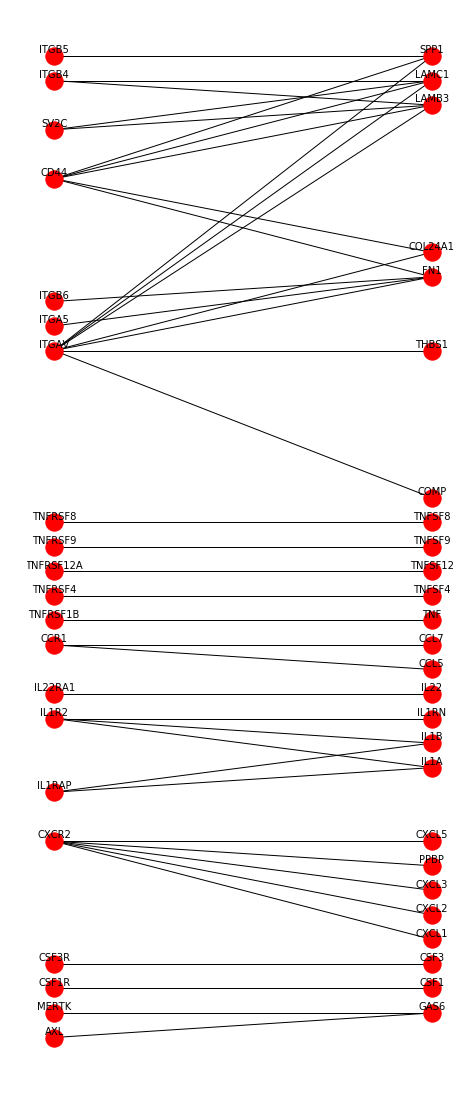

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 15]

B = nx.Graph()
B.add_nodes_from(df_lr_new['From'], bipartite=0)
B.add_nodes_from(df_lr_new['To'], bipartite=1)
B.add_weighted_edges_from(
    [(row['From'], row['To'], 1) for idx, row in df_lr_new.iterrows()], 
    weight='weight')


pos = {node:[0, i] for i,node in enumerate(df_lr_new['To'])}
pos.update({node:[1, i] for i,node in enumerate(df_lr_new['From'])})
nx.draw(B, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(B, pos, font_size=10)

plt.show()